In [3]:
require("Hmisc")
require("dplyr")
require("profvis")
require("R.utils")
require("Biostrings")
require("data.table")
require("ggplot2")

Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: profvis

Loading required package: R.utils

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.26.0 (2024-01-24 05:12:50 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘pac

,TLEN,EndMotif_tmp,side,sample_id,Count,EndMotif
,<int>,<fct>,<fct>,<fct>,<int>,<fct>
1,-500,AAG,R1neg,2105643Mod,1,CTT
2,-500,ACC,R1neg,2105643Mod,2,GGT
3,-500,ACG,R1neg,2105643Mod,1,CGT
4,-500,AGC,R1neg,2105643Mod,1,GCT
5,-500,AGG,R1neg,2105643Mod,1,CCT
6,-500,AGT,R1neg,2105643Mod,3,ACT


`summarise()` has grouped output by 'sample_id', 'EndMotif'. You can override using the `.groups` argument.


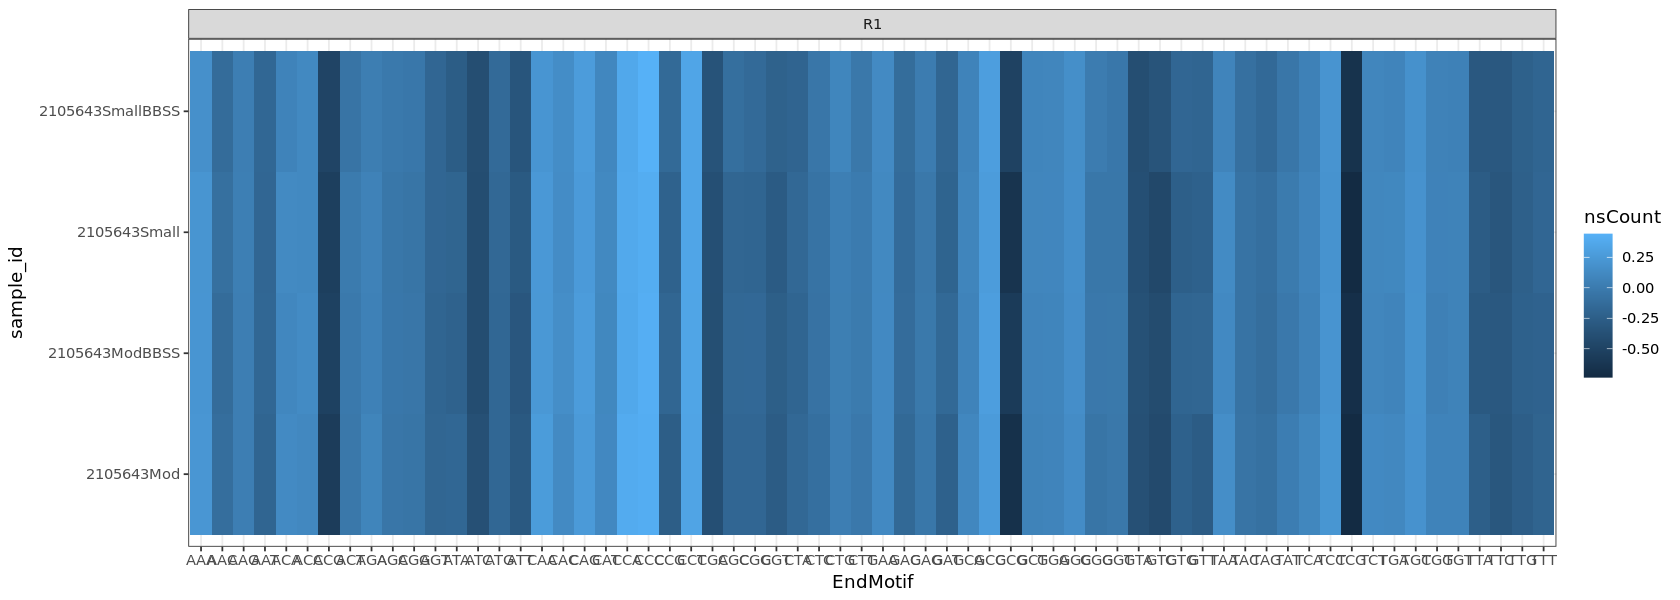

In [19]:
foal_nonMT_IS_meta <- fread(file = "../../output/04_fragmentomics/foal_cohort_EquCabAll_host_nonMT_motif.csv") %>% as.data.frame() %>% 
    mutate(across(-c(TLEN, Count), ~ as.factor(.)))

foal_nonMT_IS_meta %>% head()

options(repr.plot.width=14, repr.plot.height=5)
cEM = foal_nonMT_IS_meta$EndMotif %>% unique() %>% length()
foal_nonMT_IS_meta %>% 
    mutate(TLEN = abs(TLEN)) %>% 
    filter(TLEN < 300) %>% 
    mutate(read = substring(side, 0, 2)) %>% 
    filter(read == "R1") %>% 
    group_by(sample_id, EndMotif, read) %>%
    summarise(sCount = sum(Count, na.rm = TRUE)) %>%     
    group_by(sample_id, read) %>% 
    mutate(nsCount = log10(sCount/sum(sCount)*cEM)) %>% 
    ggplot(aes(x = EndMotif, y = sample_id, fill = nsCount)) + 
        geom_tile() +  facet_grid(cols = vars(read)) + theme_bw() 